In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import pde_opt
from pde_opt.model import OptimizationModel
from pde_opt.numerics.equations.cahn_hilliard import CahnHilliard2DPeriodic
from pde_opt.numerics.solvers import SemiImplicitFourierSpectral
from pde_opt.numerics.domains import Domain
from pde_opt.numerics.functions import (
    DiffusionLegendrePolynomials,
    ChemicalPotentialLegendrePolynomials,
)

import equinox as eqx
import diffrax

In [2]:
Nx = Ny = 128
Lx = Ly = 0.01 * 128

domain = Domain(
    (Nx, Ny),
    (
        (-Lx / 2, Lx / 2),
        (-Ly / 2, Ly / 2),
    ),
    "dimensionless",
)

In [3]:
opt_model = OptimizationModel(
    equation_type=CahnHilliard2DPeriodic,
    domain=domain,
    solver_type=SemiImplicitFourierSpectral,
)

In [4]:
params = {
    "kappa": 0.002,
    "mu": ChemicalPotentialLegendrePolynomials(
        jnp.array([0.0, -3.0]), lambda x: jnp.log(x / (1.0 - x))
    ),
    "D": DiffusionLegendrePolynomials(jnp.array([0.0])),
}

# params = {"kappa": 0.002, "mu": lambda c: jnp.log(c / (1.0 - c)) + 3.0 * (1.0 - 2.0 * c), "D": lambda c: (1.0 - c) * c}

solver_params = {"A": 0.5}

key = jax.random.PRNGKey(0)
y0 = jnp.clip(0.01 * jax.random.normal(key, (Nx, Ny)) + 0.5, 0.0, 1.0)
ts = jnp.linspace(0.0, 0.02, 100)
print(y0.shape)

(128, 128)


In [5]:
sol = opt_model.solve(params, y0, ts, solver_params, dt0=0.000001, max_steps=1000000)

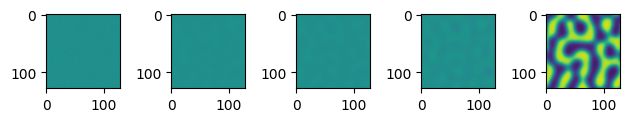

In [6]:
fig, ax = plt.subplots(1, 5)
ax[0].imshow(sol[0], vmin=0.0, vmax=1.0)
ax[1].imshow(sol[10], vmin=0.0, vmax=1.0)
ax[2].imshow(sol[20], vmin=0.0, vmax=1.0)
ax[3].imshow(sol[30], vmin=0.0, vmax=1.0)
ax[4].imshow(sol[-1], vmin=0.0, vmax=1.0)
plt.tight_layout()
plt.show()

In [7]:
data = {}
data['ys'] = sol
data['ts'] = ts

inds = [[30,40,50], [50,60,70], [70,80,90]]

init_params = {
    "mu": ChemicalPotentialLegendrePolynomials(
        jnp.array([0.0, -2.0]), lambda x: jnp.log(x / (1.0 - x))
    ),
    "D": DiffusionLegendrePolynomials(jnp.array([0.0])),
}

weights = {
    "mu": ChemicalPotentialLegendrePolynomials(jnp.array([0.0, 0.0])),
    "D": DiffusionLegendrePolynomials(jnp.array([0.0])),
}


In [8]:
res = opt_model.train(data, inds, init_params, {"kappa": 0.002}, solver_params, weights, 1000.0)

Loss on this step: 0.027133774012327194, Loss on the last accepted step: 0.0, Step size: 1.0
Loss on this step: 0.026639660820364952, Loss on the last accepted step: 0.027133774012327194, Step size: 1.0
Loss on this step: 0.02611524984240532, Loss on the last accepted step: 0.026639660820364952, Step size: 1.0
Loss on this step: 0.025558888912200928, Loss on the last accepted step: 0.02611524984240532, Step size: 1.0
Loss on this step: 0.024968981742858887, Loss on the last accepted step: 0.025558888912200928, Step size: 1.0
Loss on this step: 0.024343980476260185, Loss on the last accepted step: 0.024968981742858887, Step size: 1.0
Loss on this step: 0.023682456463575363, Loss on the last accepted step: 0.024343980476260185, Step size: 1.0
Loss on this step: 0.02298317849636078, Loss on the last accepted step: 0.023682456463575363, Step size: 1.0
Loss on this step: 0.022245164960622787, Loss on the last accepted step: 0.02298317849636078, Step size: 1.0
Loss on this step: 0.0214677490

In [10]:
res

{'D': DiffusionLegendrePolynomials(
   expansion=LegendrePolynomialExpansion(params=f32[1], max_degree=0)
 ),
 'mu': ChemicalPotentialLegendrePolynomials(
   expansion=LegendrePolynomialExpansion(params=f32[2], max_degree=1),
   prior_fn=<function <lambda>>
 ),
 'kappa': 0.002}